## Part A

Formulation to determine the minimum number of sensors:

*Decision Variables:*

$x_{v} = \begin{cases}
  1 & \text{sensor is placed at location v where v} \in \nu\\    
  0 & \text{sensor isn't placed at location v}    
\end{cases}$

$x_v$ is a binary variable that states if sensor is placed at node v.

*Objective Function:* <br>
$min \sum_{v=1}^{v=811} x_v$ 

*Constraints:* <br>

1. $1 \leq \sum_{v=1}^{v=811} F_{e,v} x_v$ $\hspace{0.5cm} \forall e \in \epsilon$
2. $x_v$ is a  binary variables - $x_v \in \{0,1\}$

## Part B

In [47]:
# Install and Import the necessary packages and dependencies
!pip install pulp
import pulp
from pulp import *
import numpy as np
import time

In [13]:
import pandas as pd

file_path = "Detection_Matrix.csv"
detection_matrix_df = pd.read_csv(file_path)

#Show the detection matrix
detection_matrix_df.head()


,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.797,0.798,0.799,0.800,0.801,0.802,0.803,0.804,0.805,0.806
0,0,1,0,0,0,0,0,1,1,0,...,0,1,1,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,...,0,1,1,0,0,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0


In [14]:
#pip install pulp
import pulp
from pulp import *

# Create the problem
problem = LpProblem("SensorPlacement", LpMinimize)

# Number of nodes and pipes
num_pipes, num_nodes = detection_matrix_df.shape

# Decision variables
x = LpVariable.dicts("Sensor", range(num_nodes), 0, 1, cat='Binary')

# Objective function: Minimize the number of sensors
problem += lpSum(x[n] for n in range(num_nodes))

# Constraints: Ensure each pipe is covered by at least one sensor
for pipe in range(num_pipes):
    problem += lpSum(detection_matrix_df.iloc[pipe, node] * x[node] for node in range(num_nodes)) >= 1

# Specify the path to Gurobi
path_to_Gurobi = 'C:/gurobi1003/win64/bin/gurobi_cl.exe'  # Update with your Gurobi path

# Solve the problem using Gurobi
problem.solve(GUROBI_CMD(path=path_to_Gurobi))

# Extracting results
sensor_locations = [n for n in range(num_nodes) if x[n].varValue > 0.5]
optimal_number_of_sensors = len(sensor_locations)

print("Sensor Locations (node indices):", sensor_locations)
print("Optimal Number of Sensors:", optimal_number_of_sensors)


Sensor Locations (node indices): [16, 58, 78, 104, 105, 156, 206, 277, 392, 394, 424, 430, 438, 483, 705, 712, 748, 786, 798]
Optimal Number of Sensors: 19


## Part C

To formulate this new integer problem, we must redefine the decision variables, objective function and constraints.

**Decision Variables:**

$x_{v} = \begin{cases}
  1 & \text{sensor is placed at location v where v} \in \nu\\    
  0 & \text{sensor isn't placed at location v}    
\end{cases}$

$z_{e} = \begin{cases}
  1 & \text{pipe burst is detected where e } \in \epsilon\\    
  0 & \text{pipe burst isn't detected}    
\end{cases}$

$z_e$ is a binary variable that states if pipe e's burst will be detected. 

**Objective Function:** <br>
$max \sum_{e=1}^{e=1123} 0.1z_e$ 

**Constraints:** <br>

1. $z_e \leq \sum_{v=1}^{v=811} F_{e,v} x_v$ $\hspace{0.5cm} \forall e \in \epsilon$
2. $\sum_{v=1}^{v=811} x_v \leq b$
3. $x_v$ and $z_e$ are binary variables - $x_v \in \{0,1\}$ and $z_e \in \{0,1\}$

## Part D

In [48]:
ts = time.time()
import matplotlib.pyplot as plt

num_pipes, num_nodes = detection_matrix_df.shape

# Storage for the results
optimal_values = []
total_pipes_detected_1  = []

for b in range(21):  # Varying the number of sensors from 0 to 20
    # Create the problem with a maximization objective
    problem = LpProblem("MaximizeDetectedBursts_b" + str(b), LpMaximize)

    # Decision variables
    x = LpVariable.dicts("Sensor", range(num_nodes), 0, 1, cat='Binary')
    z = LpVariable.dicts("BurstDetected", range(num_pipes), 0, 1, cat='Binary')

    # Objective function
    problem += lpSum(0.1 * z[e] for e in range(num_pipes))

    # Constraints
    for e in range(num_pipes):
        problem += z[e] <= lpSum(detection_matrix_df.iloc[e, v] * x[v] for v in range(num_nodes))

    # Limit the number of sensors to the current value of b
    problem += lpSum(x[v] for v in range(num_nodes)) <= b

    # Solve the problem using Gurobi
    problem.solve(GUROBI_CMD(path=path_to_Gurobi))

    # Store the optimal value
    total_pipes_detected_1.append(sum(z[e].varValue for e in range(num_pipes)))
    optimal_values.append(value(problem.objective))
    
    
    sensor_locations = [n for n in range(num_nodes) if x[n].varValue > 0.5]
    print("Sensor locations for b=", b, " is:", sensor_locations)

te = time.time()
print(f'Time taken to run 20 iterations - {round(te-ts, 2)} seconds')

Sensor locations for b= 0  is: []
Sensor locations for b= 1  is: [36]
Sensor locations for b= 2  is: [42, 614]
Sensor locations for b= 3  is: [140, 614, 690]
Sensor locations for b= 4  is: [237, 614, 690, 764]
Sensor locations for b= 5  is: [140, 237, 646, 690, 712]
Sensor locations for b= 6  is: [67, 287, 450, 591, 595, 722]
Sensor locations for b= 7  is: [67, 206, 450, 591, 619, 712, 774]
Sensor locations for b= 8  is: [67, 103, 206, 451, 591, 619, 712, 775]
Sensor locations for b= 9  is: [34, 67, 103, 206, 233, 619, 651, 712, 714]
Sensor locations for b= 10  is: [103, 206, 240, 267, 344, 619, 712, 714, 720, 798]
Sensor locations for b= 11  is: [78, 103, 206, 240, 344, 392, 619, 712, 714, 720, 798]
Sensor locations for b= 12  is: [78, 103, 164, 206, 240, 344, 392, 438, 483, 712, 714, 798]
Sensor locations for b= 13  is: [77, 78, 103, 142, 168, 206, 277, 333, 392, 415, 465, 483, 540]
Sensor locations for b= 14  is: [103, 164, 233, 267, 277, 355, 392, 394, 415, 483, 651, 712, 720, 748]

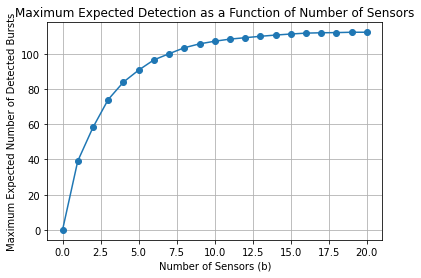

In [43]:
# Plotting the results
plt.plot(range(21), optimal_values, marker='o')
plt.xlabel('Number of Sensors (b)')
plt.ylabel('Maximum Expected Number of Detected Bursts')
plt.title('Maximum Expected Detection as a Function of Number of Sensors')
plt.grid(True)
plt.show()

## Part E

In [50]:
ts = time.time()
final_objective_values = []
total_pipes_detected = []
nodes_selected = []
prob = 0.1

for b in range(21):
    pipes_detected = 0
    copy_det_matrix = detection_matrix_df.copy()
    
    for i in range(b):
        if copy_det_matrix.shape[0] == 0:
            print("All pipes detected using", b, " sensors")
            break
        else:
            col_sum = np.sum(copy_det_matrix, axis = 0)
            
            # Sensor with max pipe detection
            max_pipes_sens_id = np.argmax(col_sum)
            nodes_selected.append(max_pipes_sens_id)
            
            # Total number of pipes detected
            pipes_detected = pipes_detected + col_sum[max_pipes_sens_id]
            
            # Remove pipes that are detected
            copy_det_matrix = copy_det_matrix[copy_det_matrix.iloc[:, max_pipes_sens_id] == 0]
            
    
    total_pipes_detected.append(pipes_detected)
    final_objective_values.append(prob*pipes_detected)

te = time.time()
print(f'Time taken to run sequential solution - {round(te-ts, 2)} seconds')

Time taken to run sequential solution - 2.18 seconds


In [51]:
total_pipes_detected

[0,
 391,
 562,
 729,
 805,
 864,
 918,
 960,
 994,
 1019,
 1038,
 1055,
 1067,
 1079,
 1087,
 1094,
 1100,
 1105,
 1109,
 1112,
 1115]

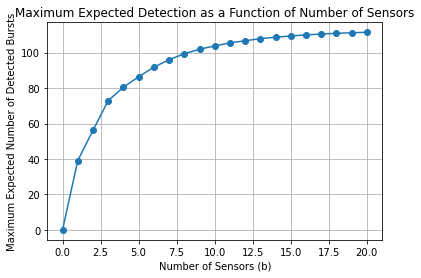

In [31]:
# Plotting the results
plt.plot(range(21), final_objective_values, marker='o')
plt.xlabel('Number of Sensors (b)')
plt.ylabel('Maximum Expected Number of Detected Bursts')
plt.title('Maximum Expected Detection as a Function of Number of Sensors')
plt.grid(True)
plt.show()

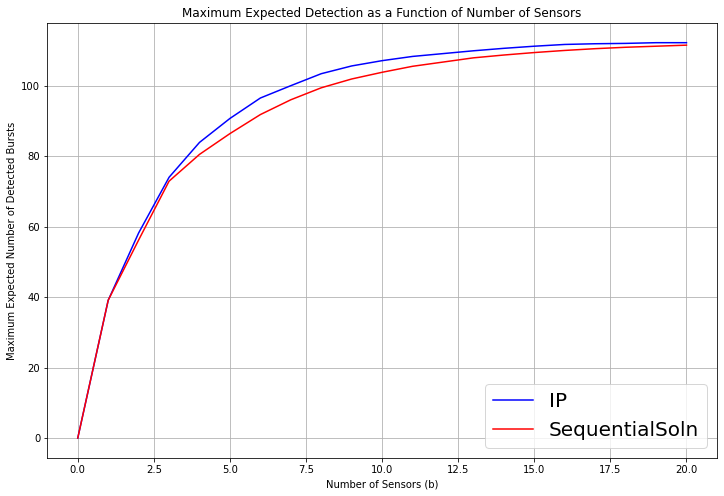

In [41]:
# Plotting the results
_, ax = plt.subplots(figsize = (12,8))
ax.plot(range(21), optimal_values, color = 'b', label = 'IP')
ax.plot(range(21), final_objective_values, color = 'r', label = 'SequentialSoln')
plt.xlabel('Number of Sensors (b)')
plt.ylabel('Maximum Expected Number of Detected Bursts')
plt.title('Maximum Expected Detection as a Function of Number of Sensors')
plt.legend(prop={'size': 20})
plt.grid(True)
plt.show()

## Part F

In this integer problem, we introduce a new variable for criticality and redefine the objective function and constraints.

**Decision Variables:**

$x_{v} = \begin{cases}
  1 & \text{sensor is placed at location v where v} \in \nu\\    
  0 & \text{sensor isn't placed at location v}    
\end{cases}$

$z_{e} = \begin{cases}
  1 & \text{pipe burst is detected where e } \in \epsilon\\    
  0 & \text{pipe burst isn't detected}    
\end{cases}$

$w_e$ is a continuous variable that ranges between [0, 1]. The higher $w_e$ is, the more critical pipe $e$ is.

**Objective Function:** <br>
$min$ $max$ $w_e(1- z_e)$ $\hspace{0.5cm} \forall e \in \epsilon$

Let's represent $max$ $w_e(1- z_e)$ as $k$. The linearized objective function would be: <br>
$min$ $k$ <br>
s.t. $ k \geq w_e(1-z_e)$ $\hspace{0.5cm} \forall e \in \epsilon$

**Constraints:** <br>
1. $ k \geq w_e(1-z_e)$ $\hspace{0.5cm} \forall e \in \epsilon$
2. $z_e \leq \sum_{v=1}^{v=811} F_{e,v} x_v$ $\hspace{0.5cm} \forall e \in \epsilon$
3. $\sum_{v=1}^{v=811} x_v \leq b$
4. $x_v$ and $z_e$ are binary variables - $x_v \in \{0,1\}$ and $z_e \in \{0,1\}$

## Part G

In [9]:
file_path_criticality = "Criticality.csv"
criticality = pd.read_csv(file_path_criticality, header = None)

# Brief look at the criticality file
criticality.head()

,0
0,0.12
1,0.41
2,0.02
3,0.53
4,0.99


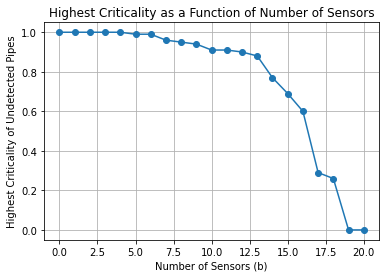

In [16]:
num_pipes, num_nodes = detection_matrix_df.shape

# Storage for the results
optimal_values_crit = []

for b in range(21):  # Varying the number of sensors from 0 to 20
    # Create the problem with a minimization objective
    problem = LpProblem("MinHighestCriticality" + str(b), LpMinimize)

    # Decision variables
    x = LpVariable.dicts("Sensor", range(num_nodes), 0, 1, cat='Binary')
    z = LpVariable.dicts("BurstDetected", range(num_pipes), 0, 1, cat='Binary')
    k = LpVariable("NewVar_Max", 0, cat = 'Continuous')

    # Objective function
    problem += k

    # Constraints
    
    # New Constraint for the Maximization of Criticality
    for e in range(num_pipes):
        problem += k >= criticality.iloc[e, :] * (1 - z[e])
    
    # 
    for e in range(num_pipes):
        problem += z[e] <= lpSum(detection_matrix_df.iloc[e, v] * x[v] for v in range(num_nodes))

    # Limit the number of sensors to the current value of b
    problem += lpSum(x[v] for v in range(num_nodes)) <= b

    # Solve the problem using Gurobi
    problem.solve(GUROBI_CMD(path=path_to_Gurobi))

    # Store the optimal value
    optimal_values_crit.append(value(problem.objective))

# Plotting the results
plt.plot(range(21), optimal_values_crit, marker='o')
plt.xlabel('Number of Sensors (b)')
plt.ylabel('Highest Criticality of Undetected Pipes')
plt.title('Highest Criticality as a Function of Number of Sensors')
plt.grid(True)
plt.show()